In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Wall time: 645 ms


In [2]:
dataset = pd.read_csv("Carriage_services_train_12-17.csv")
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-03-30,7.59,7.59,7.42,7.55,7.040191,26100
1,2012-04-02,7.51,7.57,7.43,7.46,6.956265,35000
2,2012-04-03,7.49,7.50,7.40,7.48,6.974916,29200
3,2012-04-04,7.40,7.50,7.15,7.50,6.993565,44100
4,2012-04-05,7.43,7.50,7.40,7.50,6.993565,14500


In [3]:
train_set = dataset.iloc[:,2:3].values

In [4]:
train_set.size

1255

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
train_set_scaled = sc.fit_transform(train_set)

In [7]:
X_train = []
Y_train = []
for i in range(60,1255):
    X_train.append(train_set_scaled[i-60:i,0])
    Y_train.append(train_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# (191,60,1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

In [10]:
model = Sequential()
model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 80))
model.add(Dropout(0.1))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

In [11]:
model.fit(X_train, Y_train, batch_size = 64, epochs = 300)

Train on 1195 samples
Epoch 1/300
1195/1195 [==============================] - 8s 7ms/sample - loss: 0.2022 - mse: 0.2022
Epoch 2/300
1195/1195 [==============================] - 1s 526us/sample - loss: 0.0740 - mse: 0.0740
Epoch 3/300
1195/1195 [==============================] - 1s 527us/sample - loss: 0.0499 - mse: 0.0499
Epoch 4/300
1195/1195 [==============================] - 1s 531us/sample - loss: 0.0401 - mse: 0.0401
Epoch 5/300
1195/1195 [==============================] - 1s 523us/sample - loss: 0.0348 - mse: 0.0348
Epoch 6/300
1195/1195 [==============================] - 1s 527us/sample - loss: 0.0341 - mse: 0.0341
Epoch 7/300
1195/1195 [==============================] - 1s 524us/sample - loss: 0.0312 - mse: 0.0312
Epoch 8/300
1195/1195 [==============================] - 1s 523us/sample - loss: 0.0298 - mse: 0.0298
Epoch 9/300
1195/1195 [==============================] - 1s 533us/sample - loss: 0.0301 - mse: 0.0301
Epoch 10/300
1195/1195 [==============================] - 1s 5

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  26240     
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
lstm_1 (LSTM)                multiple                  51520     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
lstm_2 (LSTM)                multiple                  51520     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
lstm_3 (LSTM)                multiple                  5

In [29]:
dataset_test = pd.read_csv("Carriage_services_test_17-18.csv")
real_stock_price = dataset_test.iloc[:,2:3].values

In [39]:
# getting the predicted stock price of 2017-2018
dataset_total = pd.concat((dataset['High'], dataset_test['High']), axis = 0)

In [40]:
print('dataset total : {}'.format(len(dataset_total)))
print('dataset test : {}'.format(len(dataset_test)))

dataset total : 1505
dataset test : 250


In [41]:
len(dataset_total[len(dataset_total) - len(dataset_test) - 60:])

310

In [49]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs.shape

(310, 1)

In [43]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 310):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
predicted_stock = model.predict(X_test)

In [46]:
predicted_stock = sc.inverse_transform(predicted_stock)

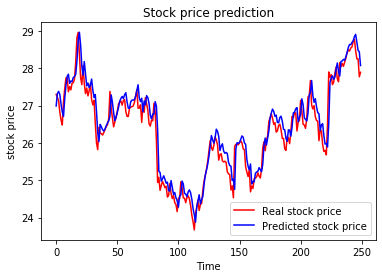

In [71]:
%matplotlib inline
plt.plot(real_stock_price, color='red', label='Real stock price')
plt.plot(predicted_stock, color='blue', label = 'Predicted stock price')
plt.title('Stock price prediction')
plt.xlabel('Time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [72]:
# just to make a csv file with the original Hign price and the predicted High price


np.savetxt("Carriage_services_High.csv",predicted_stock,delimiter=',',header='Predicted_High', comments='')
pred_file = pd.read_csv('Carriage_services.csv')
preds = pd.concat((dataset_test['High'], pred_file['Predicted_High']), axis = 1)
preds.to_csv("Carriage_services_stock_predictions.csv", encoding='utf-8', index=False)